# DATA*6100 Final Project - Evan Switzer
Netflix User Rating Dataset



## Executive Summary
**Data Pre-Processing:**

For the data pre-processing step I first analyzed the data. The first thing I wanted to deal with is genres. Each movie could have multiple so for each genre I gave it it's own column. I then pulled the year from the title. After this I realized I probably did not have enough data for what I wanted to do. To fix this I got information on every movie from tmdb. Once I had all of the details on the movies I needed to add the details to the movie info I already had. I used the Id to combine them. 8 movies had no tmdbId so I removed them.

Then I went and looked for missing values. There were a lot of columns with a tiny bit of missing values that seemed to all be connected. About 100 movies didn't have a tmdb id that worked. I found replacements but decided against doing that for all ~100 as 100 in ~10,000 was small. I then dealt with if a movie belonged to a collection. If it did it got a 1, if not it got a 0. The remaining missing values came from columns that were not important.

Some information was hidden inside objects in columns, so for areas of production companies, production countries and spoken languages I turned each unique value into a column. These had a lot of values with small amounts of times used, so I only used categories that had 30 or more occurances. This is because Pixar had 32 and I wanted to include them.

After fixing up some small things, splitting up the released date category into parts and removing the adult column I was done pre-processing!

**Modelling and Model Tuning:**

For Modelling I tried using a Neural Net and Linear Regression. My Neural Net ran into a lot of issues. The first things I ran into is it predicting all the same values. After I scaled my data and gave it more epochs it then ended up around 100,000,000 as a prediction. Neither one seemed correct but I could not figure out where I went wrong.

For Linear Regression I did a simple backwards elimination. This went 1 by 1 and got rid of the highest p-value. Then I re-trained on the full data with the selected columns.


**Final Model:**

The final model ended up with a Root Mean Squared Value of 105

In [156]:
import pandas as pd
import numpy as np

links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings_train = pd.read_csv('movie_ratings_train.csv')
ratings_test = pd.read_csv('movie_ratings_test.csv')

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Pre-Processing

In [157]:
#get list of unique genres
genres = []
for i in movies['genres']:
    for j in i.split('|'):
        if j not in genres:
            genres.append(j)

genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [158]:
#create new columns for each genre
for i in genres:
    #if genre is in movie genres, set to 1
    movies[i] = movies['genres'].apply(lambda x: 1 if i in x else 0)

movies.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
#get year from title

years = []

for i in movies['title']:
    year_str = i[-5:-1]
    try:
        years.append(int(year_str))
    except ValueError:
        years.append(np.nan)

movies['year'] = years

movies.tail()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2017.0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018.0
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1991.0


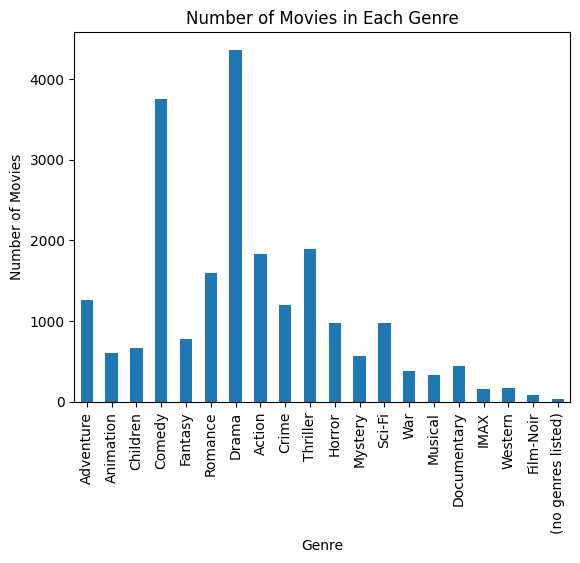

In [160]:
#bar chart of number of movies in each genre
import matplotlib.pyplot as plt

movies[genres].sum().plot.bar()
plt.title('Number of Movies in Each Genre')
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.show()


Does having less genres matter? Maybe having only comedy vs comedy + others does something

In [161]:
#api key
api_key = "dadfbbef227d426c66fed7e4b71b58cd"

In [162]:
#set up tmdb api
import requests

url = f"https://api.themoviedb.org/3/authentication?api_key={api_key}"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

{"success":true,"status_code":1,"status_message":"Success."}


In [163]:
import aiohttp
import asyncio
from tqdm import tqdm

async def fetch(session, url, progress):
    async with session.get(url) as response:
        progress.update(1)
        return await response.json()

async def fetch_all(urls):
    progress = tqdm(total=len(urls), desc="API calls")
    async with aiohttp.ClientSession() as session:
        results = await asyncio.gather(*[fetch(session, url, progress) for url in urls], return_exceptions=True)
    progress.close()
    return results

tmdb_movies = dict()
urls = [f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}" for movie_id in links['tmdbId']]

movies_resp = await fetch_all(urls)

for movie_id, movie in zip(links['tmdbId'], movies_resp):
    tmdb_movies[movie_id] = movie

API calls: 100%|██████████| 9742/9742 [00:07<00:00, 1330.19it/s]


In [164]:
#create array of elements in tmbd_movies

tmdb_movies_array = []

for key in tmdb_movies.keys():
    #print(tmdb_movies[key])
    for i in tmdb_movies[key].keys():
        #add to tmdb_movies_array if not in there
        if i not in tmdb_movies_array:
            tmdb_movies_array.append(i)

#get number of rows
print(len(tmdb_movies))
tmdb_movies_array


9741


['adult',
 'backdrop_path',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count',
 'success',
 'status_code',
 'status_message']

In [165]:
#change id to movieId for movies
movies.rename(columns={'id':'movieId'}, inplace=True)
movies

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2017.0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018.0


In [166]:
#merge movies, links, tmdb_movies and ratings_train
movies_links = pd.merge(pd.DataFrame(movies), pd.DataFrame(links), on='movieId')
movies_links

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1995.0,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1995.0,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1995.0,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1995.0,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1995.0,113041,11862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,2017.0,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,2017.0,5914996,445030.0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2017.0,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2018.0,8391976,483455.0


In [167]:
tmdb_movies_df = pd.DataFrame(tmdb_movies).transpose()
tmdb_movies_df = tmdb_movies_df.reset_index().rename(columns={'index': 'tmdbId'})
tmdb_movies_df

,tmdbId,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,success,status_code,status_message
0,862.0,False,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hang on for the comedy that goes to infinity a...,Toy Story,False,7.971,17372,NaN,NaN,NaN
1,8844.0,False,/pYw10zrqfkdm3yD9JTO6vEGQhKy.jpg,"{'id': 495527, 'name': 'Jumanji Collection', '...",65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.sonypictures.com/movies/jumanji/,8844,tt0113497,en,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Roll the dice and unleash the excitement!,Jumanji,False,7.239,9954,NaN,NaN,NaN
2,15602.0,False,/1J4Z7VhdAgtdd97nCxY7dcBpjGT.jpg,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",25000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",,15602,tt0113228,en,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,353,NaN,NaN,NaN
3,31357.0,False,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,None,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,31357,tt0114885,en,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.193,145,NaN,NaN,NaN
4,11862.0,False,/lEsjVrGU21BeJjF5AF9EWsihDpw.jpg,"{'id': 96871, 'name': 'Father of the Bride (St...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",,11862,tt0113041,en,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Just when his world is back to normal... he's ...,Father of the Bride Part II,False,6.237,676,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9736,432131.0,False,/clFQR5zwzDrayMVVe7axo0YLFfh.jpg,"{'id': 511109, 'name': 'Kuroshithuji Collectio...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",http://www.kuroshitsuji-movie.com/,432131,tt5476944,ja,...,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,,Black Butler: Book of the Atlantic,False,7.7,82,NaN,NaN,NaN
9737,445030.0,False,/rONo71gkE9JxXRmbsQC5vJ693Yw.jpg,None,0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",http://ngnl.jp/,445030,tt5914996,ja,...,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,,No Game No Life: Zero,False,7.811,347,NaN,NaN,NaN
9738,479308.0,False,/tcM6XoTYKATJyNTIuGPk4yh0g6N.jpg,None,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",http://www.mylifetime.com/movies/flint,479308,tt6397426,en,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,Flint,False,6.8,16,NaN,NaN,NaN
9739,483455.0,False,/vjnS4iu0SdwXm2LLqZGNCfpId9t.jpg,None,0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",http://bungo-stray-dogs.jp/movie/,483455,tt8391976,ja,...,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,,Bungo Stray Dogs: Dead Apple,False,8.2,133,NaN,NaN,NaN


In [168]:
movies_links_tmdb = pd.merge(movies_links, tmdb_movies_df, on='tmdbId')
movies_links_tmdb

,movieId,title_x,genres_x,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,spoken_languages,status,tagline,title_y,video,vote_average,vote_count,success,status_code,status_message
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hang on for the comedy that goes to infinity a...,Toy Story,False,7.971,17372,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Roll the dice and unleash the excitement!,Jumanji,False,7.239,9954,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,353,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.193,145,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Just when his world is back to normal... he's ...,Father of the Bride Part II,False,6.237,676,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,,Black Butler: Book of the Atlantic,False,7.7,82,NaN,NaN,NaN
9794,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,1,0,1,1,0,0,...,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,,No Game No Life: Zero,False,7.811,347,NaN,NaN,NaN
9795,193585,Flint (2017),Drama,0,0,0,0,0,0,1,...,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,Flint,False,6.8,16,NaN,NaN,NaN
9796,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,0,0,0,0,...,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,,Bungo Stray Dogs: Dead Apple,False,8.2,133,NaN,NaN,NaN


In [169]:
#missing tmdbId in links
missing_tmdbId = links[links['tmdbId'].isnull()]
missing_tmdbId

#found 8 missing movies with no tmbdId
#looked into it and they are insignificant enough that I am just going to get rid of them
#realistically I should cross reference with imdb but that's a lot of work

,movieId,imdbId,tmdbId
624,791,113610,NaN
843,1107,102336,NaN
2141,2851,81454,NaN
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN
7382,79299,874957,NaN


In [170]:
#remove any missing_tmdbId from movies_links_tmdb
movies_links_tmdb = movies_links_tmdb[~movies_links_tmdb['movieId'].isin(missing_tmdbId['movieId'])]

Now I have to clean up this mess

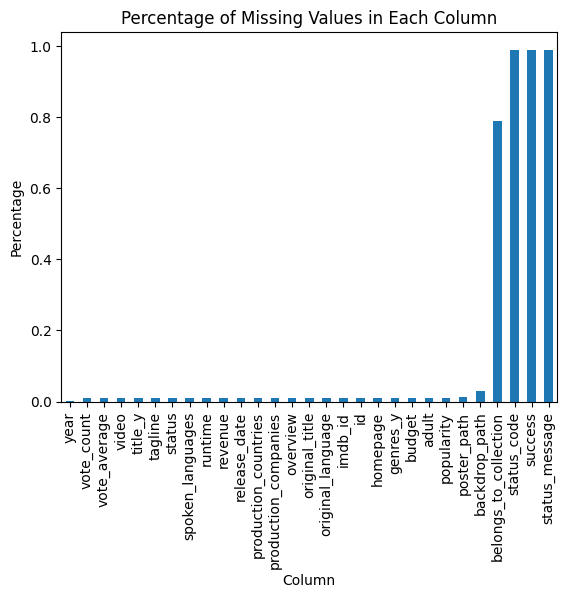

In [171]:
#find columns with high amounts of missing values by % and graph ones that have missing values
missing = movies_links_tmdb.isnull().sum()/len(movies_links_tmdb)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title('Percentage of Missing Values in Each Column')
plt.ylabel('Percentage')
plt.xlabel('Column')
plt.show()

All of those low value missings seem to be connected

In [172]:
#find and print rows that have missing adult values
movies_links_tmdb[movies_links_tmdb['adult'].isnull()]

,movieId,title_x,genres_x,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,spoken_languages,status,tagline,title_y,video,vote_average,vote_count,success,status_code,status_message
3187,4207,Navy Seals (1990),Action|Adventure|War,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,34,The resource you requested could not be found.
3422,4568,Best of the Best (1989),Action,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,34,The resource you requested could not be found.
3740,5069,Escaflowne: The Movie (Escaflowne) (2000),Action|Adventure|Animation|Drama|Fantasy,1,1,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,34,The resource you requested could not be found.
3801,5209,Ffolkes (1979),Action|Adventure|Thriller,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,34,The resource you requested could not be found.
5042,7646,Rose Red (2002),Horror|Mystery|Thriller,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,34,The resource you requested could not be found.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,176329,Ari Shaffir: Double Negative (2017),Comedy,0,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,34,The resource you requested could not be found.
9690,179135,Blue Planet II (2017),Documentary,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,34,The resource you requested could not be found.
9707,180263,The Shining (1997),Drama|Horror|Thriller,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,34,The resource you requested could not be found.
9746,184257,Making a Murderer (2015),Crime|Documentary,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,34,The resource you requested could not be found.


In [173]:
print(movies_links[movies_links['movieId'] == 26614])

movie_id = 8677
url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

movie_id = 895795
url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}"

headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

      movieId                        title  \
5539    26614  Bourne Identity, The (1988)   

                                       genres  Adventure  Animation  Children  \
5539  Action|Adventure|Drama|Mystery|Thriller          1          0         0   

      Comedy  Fantasy  Romance  Drama  ...  War  Musical  Documentary  IMAX  \
5539       0        0        0      1  ...    0        0            0     0   

      Western  Film-Noir  (no genres listed)    year  imdbId  tmdbId  
5539        0          0                   0  1988.0   94791  8677.0  

[1 rows x 26 columns]
{"success":false,"status_code":34,"status_message":"The resource you requested could not be found."}
{"adult":false,"backdrop_path":null,"belongs_to_collection":null,"budget":0,"genres":[{"id":53,"name":"Thriller"},{"id":28,"name":"Action"},{"id":18,"name":"Drama"}],"homepage":"","id":895795,"imdb_id":"tt0094791","original_language":"en","original_title":"The Bourne Identity","overview":"An unconscious man is washed 

Seems that the tmdbId is wrong for probably 100 or so movies. Since it seems to be a random selection I am going to remove them. As seen above I can go and manually find them each and get their correct tmdbId

In [174]:
percent = len(movies_links_tmdb[movies_links_tmdb['adult'].isnull()])/len(movies)*100
print(f"{percent:.2f}% of movies are missing values from tmdb")

1.10% of movies are missing values from tmdb


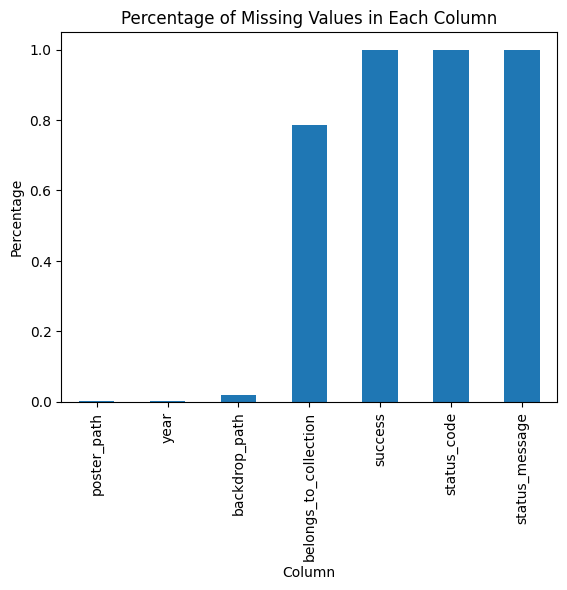

In [175]:
#remove rows that are missing adult values
movies_links_tmdb = movies_links_tmdb[~movies_links_tmdb['adult'].isnull()]

#find columns with high amounts of missing values by % and graph ones that have missing values
missing = movies_links_tmdb.isnull().sum()/len(movies_links_tmdb)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title('Percentage of Missing Values in Each Column')
plt.ylabel('Percentage')
plt.xlabel('Column')
plt.show()

In [176]:
#status code, status message, success, backdrop_path, and poster_path are all just missing files/extra info that I can't really use so we remvoe them
movies_links_tmdb = movies_links_tmdb.drop(columns=['status_code', 'status_message', 'success', 'backdrop_path', 'poster_path'])

#change belongs to collection to 1 if it is in a collection and 0 if it is not
#it is in a collection if it is not missing values
movies_links_tmdb['belongs_to_collection'] = movies_links_tmdb['belongs_to_collection'].apply(lambda x: 1 if not pd.isnull(x) else 0)


In [177]:
#remove title_x, genres_x, tagline, title_y, video as they are all unique to each movie or not useful
movies_links_tmdb = movies_links_tmdb.drop(columns=['title_x', 'genres_x', 'tagline', 'title_y', 'video'])
movies_links_tmdb.head()

,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
0,1,1,1,1,1,1,0,0,0,0,...,131.466,"[{'id': 3, 'logo_path': '/bqGuVkQKYSGixzO9YA6q...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,394400000,81,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,7.971,17372
1,2,1,0,1,0,1,0,0,0,0,...,15.519,"[{'id': 559, 'logo_path': '/eC0bWHVjnjUducyA6Y...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262821940,104,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,7.239,9954
2,3,0,0,0,1,0,1,0,0,0,...,14.84,"[{'id': 19464, 'logo_path': None, 'name': 'Lan...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,71500000,101,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,6.5,353
3,4,0,0,0,1,0,1,1,0,0,...,15.437,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,6.193,145
4,5,0,0,0,1,0,0,0,0,0,...,35.475,"[{'id': 9195, 'logo_path': '/ou5BUbtulr6tIt699...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-08,76594107,106,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,6.237,676


In [178]:
#remove homepage, imdb_id, original_title, index, id
movies_links_tmdb = movies_links_tmdb.drop(columns=['homepage', 'imdb_id', 'original_title', 'id'])
movies_links_tmdb.head()

,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
0,1,1,1,1,1,1,0,0,0,0,...,131.466,"[{'id': 3, 'logo_path': '/bqGuVkQKYSGixzO9YA6q...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,394400000,81,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,7.971,17372
1,2,1,0,1,0,1,0,0,0,0,...,15.519,"[{'id': 559, 'logo_path': '/eC0bWHVjnjUducyA6Y...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262821940,104,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,7.239,9954
2,3,0,0,0,1,0,1,0,0,0,...,14.84,"[{'id': 19464, 'logo_path': None, 'name': 'Lan...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,71500000,101,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,6.5,353
3,4,0,0,0,1,0,1,1,0,0,...,15.437,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,6.193,145
4,5,0,0,0,1,0,0,0,0,0,...,35.475,"[{'id': 9195, 'logo_path': '/ou5BUbtulr6tIt699...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-08,76594107,106,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,6.237,676


In [179]:
#remove imdbId, tmdbId, overview, genres_y
movies_links_tmdb = movies_links_tmdb.drop(columns=['genres_y', 'overview', 'imdbId', 'tmdbId'])
movies_links_tmdb.head()

,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
0,1,1,1,1,1,1,0,0,0,0,...,131.466,"[{'id': 3, 'logo_path': '/bqGuVkQKYSGixzO9YA6q...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,394400000,81,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,7.971,17372
1,2,1,0,1,0,1,0,0,0,0,...,15.519,"[{'id': 559, 'logo_path': '/eC0bWHVjnjUducyA6Y...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262821940,104,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,7.239,9954
2,3,0,0,0,1,0,1,0,0,0,...,14.84,"[{'id': 19464, 'logo_path': None, 'name': 'Lan...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,71500000,101,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,6.5,353
3,4,0,0,0,1,0,1,1,0,0,...,15.437,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,6.193,145
4,5,0,0,0,1,0,0,0,0,0,...,35.475,"[{'id': 9195, 'logo_path': '/ou5BUbtulr6tIt699...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-08,76594107,106,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,6.237,676


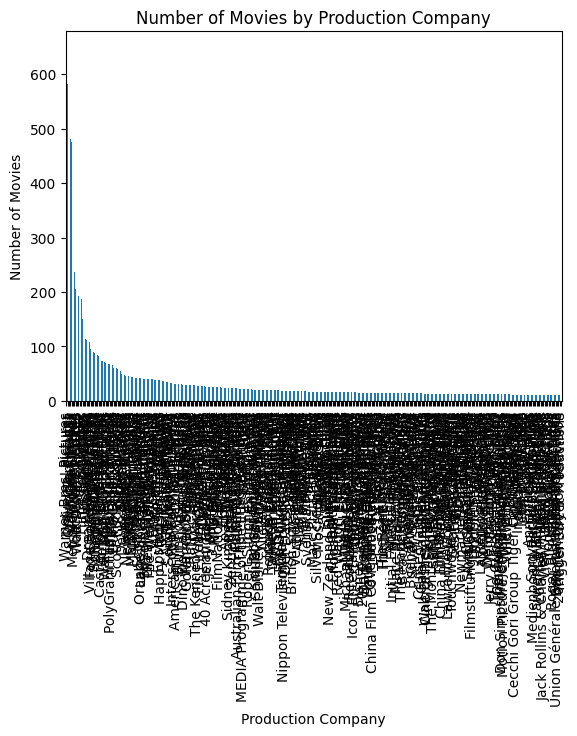

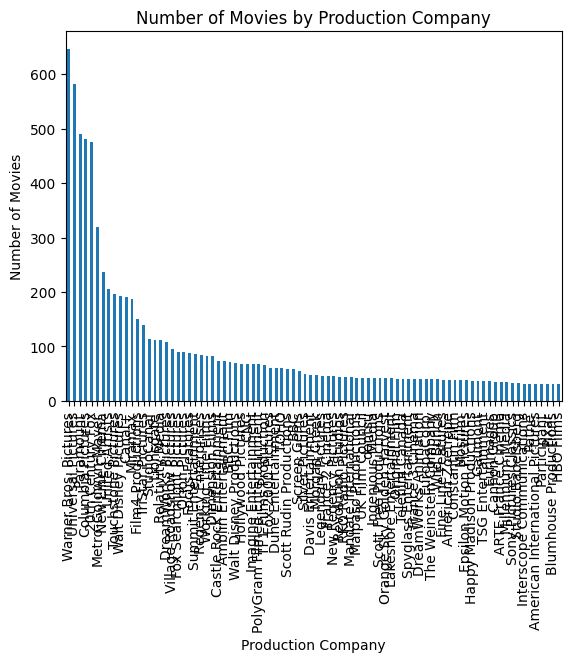

In [180]:
#get information out of objects in columns production_companies, production_countries, spoken_languages
#production_companies
#origin country might be useful but it probably is very similar to original_language so to make my life easier I am just taking name. Id also does the same but I need to make new columns for all of them anyway so name is more readable

list_of_production_companies = []

for i in movies_links_tmdb['production_companies']:
    for j in i:
        list_of_production_companies.append(j['name'])

#plot production companies with more than 10 movies
production_companies = pd.DataFrame(list_of_production_companies, columns=['name'])
counts = production_companies['name'].value_counts()
counts[counts > 10].plot.bar()
plt.title('Number of Movies by Production Company')
plt.ylabel('Number of Movies')
plt.xlabel('Production Company')
plt.show()

#so many production companies, I will abitrairly choose ones with 30 or more movies (I chose 30 because pixar has 32 and I wanted pixar in there)
#plot 30+ production companies
counts[counts > 30].plot.bar()
plt.title('Number of Movies by Production Company')
plt.ylabel('Number of Movies')
plt.xlabel('Production Company')
plt.show()

#get list of production companies with 30 or more movies
production_companies_30 = counts[counts > 30].index.tolist()


In [181]:
#for each production company in production_companies_30, create a new column with 1 if it is in the movie and 0 if it is not
for i in production_companies_30:
    movies_links_tmdb[i] = movies_links_tmdb['production_companies'].apply(lambda x: 1 if i in str(x) else 0)

In [182]:
movies_links_tmdb

,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,Millennium Media,Sony Pictures Classics,Studio Babelsberg,Interscope Communications,Pathé,American International Pictures,Participant,Pixar,Blumhouse Productions,HBO Films
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,193581,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9794,193583,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9795,193585,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9796,193587,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


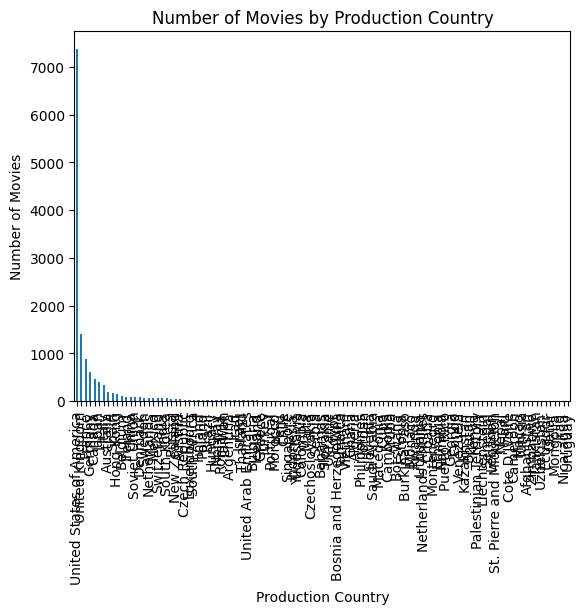

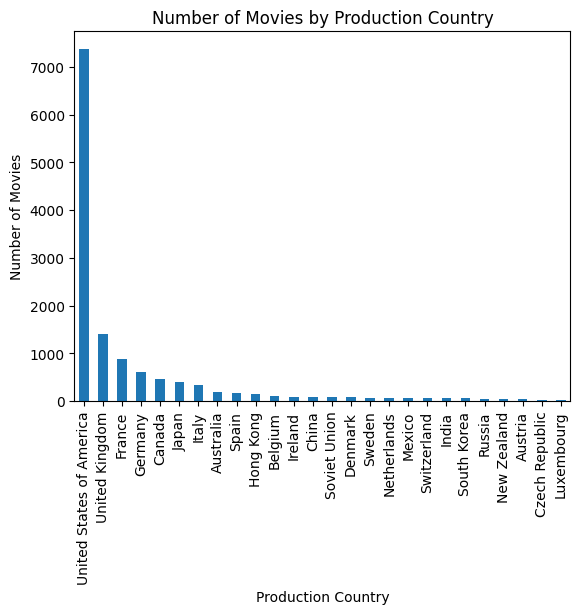

In [183]:
#production_countries
#get list of production countries

list_of_production_countries = []

for i in movies_links_tmdb['production_countries']:
    for j in i:
        list_of_production_countries.append(j['name'])

#plot production countries
production_countries = pd.DataFrame(list_of_production_countries, columns=['name'])
counts = production_countries['name'].value_counts()
counts.plot.bar()
plt.title('Number of Movies by Production Country')
plt.ylabel('Number of Movies')
plt.xlabel('Production Country')
plt.show()

#plot production countries with more than 30 movies
counts[counts > 30].plot.bar()
plt.title('Number of Movies by Production Country')
plt.ylabel('Number of Movies')
plt.xlabel('Production Country')
plt.show()

production_countries_30 = counts[counts > 30].index.tolist()

In [184]:
#for each production country in production_countries_30, create a new column with 1 if it is in the movie and 0 if it is not
new_columns = {}

for i in production_countries_30:
    new_columns[i] = movies_links_tmdb['production_countries'].apply(lambda x: 1 if i in str(x) else 0)

new_columns_df = pd.DataFrame(new_columns)
movies_links_tmdb = pd.concat([movies_links_tmdb, new_columns_df], axis=1)


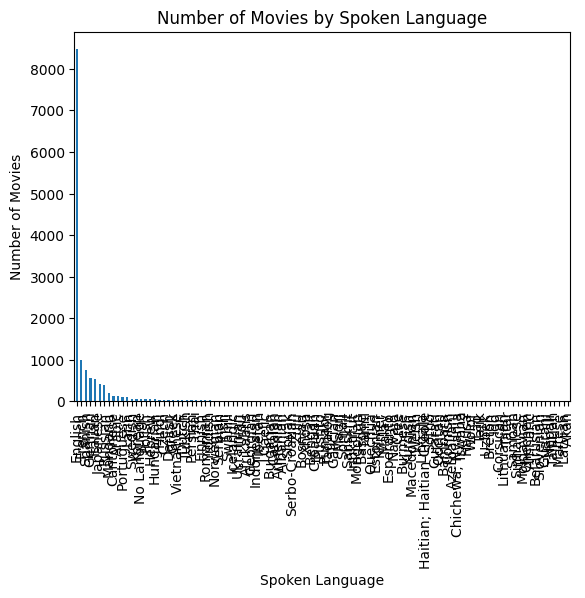

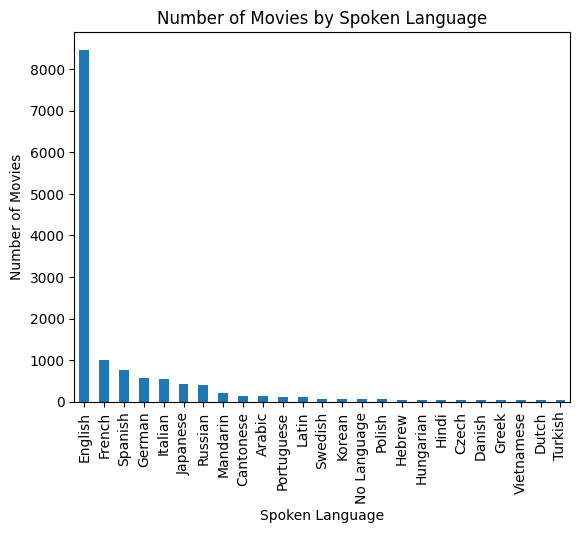

In [185]:
#spoken_languages
#get list of spoken languages


list_of_spoken_languages = []

for i in movies_links_tmdb['spoken_languages']:
    for j in i:
        list_of_spoken_languages.append(j['english_name'])

#plot spoken languages
spoken_languages = pd.DataFrame(list_of_spoken_languages, columns=['english_name'])
counts = spoken_languages['english_name'].value_counts()
counts.plot.bar()
plt.title('Number of Movies by Spoken Language')
plt.ylabel('Number of Movies')
plt.xlabel('Spoken Language')
plt.show()

#plot spoken languages with more than 30 movies
counts[counts > 30].plot.bar()
plt.title('Number of Movies by Spoken Language')
plt.ylabel('Number of Movies')
plt.xlabel('Spoken Language')
plt.show()

spoken_languages_30 = counts[counts > 30].index.tolist()

In [186]:
#for each spoken language in spoken_languages_30, create a new column with 1 if it is in the movie and 0 if it is not

new_columns = {}

for i in spoken_languages_30:
    new_columns[i] = movies_links_tmdb['spoken_languages'].apply(lambda x: 1 if i in str(x) else 0)

new_columns_df = pd.DataFrame(new_columns)
movies_links_tmdb = pd.concat([movies_links_tmdb, new_columns_df], axis=1)


In [187]:
#remove production_companies, production_countries, spoken_languages
movies_links_tmdb = movies_links_tmdb.drop(columns=['production_companies', 'production_countries', 'spoken_languages'])

i: movieId, unique values: 9627
i: Adventure, unique values: 2
i: Animation, unique values: 2
i: Children, unique values: 2
i: Comedy, unique values: 2
i: Fantasy, unique values: 2
i: Romance, unique values: 2
i: Drama, unique values: 2
i: Action, unique values: 2
i: Crime, unique values: 2
i: Thriller, unique values: 2
i: Horror, unique values: 2
i: Mystery, unique values: 2
i: Sci-Fi, unique values: 2
i: War, unique values: 2
i: Musical, unique values: 2
i: Documentary, unique values: 2
i: IMAX, unique values: 2
i: Western, unique values: 2
i: Film-Noir, unique values: 2
i: (no genres listed), unique values: 2
i: year, unique values: 107
i: adult, unique values: 1
i: belongs_to_collection, unique values: 2
i: budget, unique values: 730
i: original_language, unique values: 47
i: popularity, unique values: 8448
i: release_date, unique values: 6219
i: revenue, unique values: 5790
i: runtime, unique values: 221
i: status, unique values: 1
i: vote_average, unique values: 2528
i: vote_coun

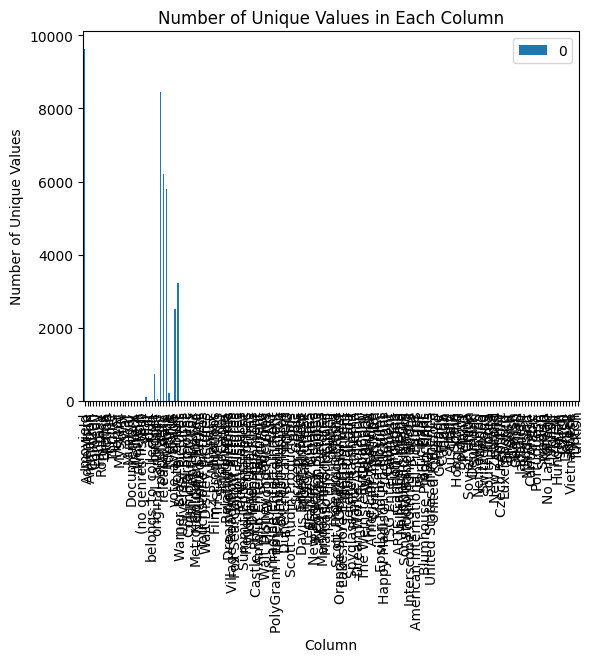

In [188]:
#Lets look at our data again. Lets look at how many unique values are in each column and graph it
unique_values = {}

for i in movies_links_tmdb.columns:
    print(f"i: {i}, unique values: {len(movies_links_tmdb[i].unique())}")
    unique_values[i] = len(movies_links_tmdb[i].unique())

#plot unique values
unique_values = pd.DataFrame(unique_values, index=[0]).transpose()
unique_values.plot.bar()
plt.title('Number of Unique Values in Each Column')
plt.ylabel('Number of Unique Values')
plt.xlabel('Column')
plt.show()

In [189]:
#drop status it is only Released
movies_links_tmdb = movies_links_tmdb.drop(columns=['status'])

#find columns with only 1 unique value
for i in movies_links_tmdb.columns:
    if len(movies_links_tmdb[i].unique()) == 1:
        print(f"i: {i}, unique values: {len(movies_links_tmdb[i].unique())}")

#i: year, unique values: 1
#i: adult, unique values: 1
#These need to be inspected earlier (if fixed they shouldn't show up here)

i: adult, unique values: 1


In [190]:
#Turns out there are no adult movies on netflix, who knew!
#remove adult
movies_links_tmdb = movies_links_tmdb.drop(columns=['adult'])

In [191]:
#List data types of columns
for i in movies_links_tmdb.columns:
    print(f"i: {i}, data type: {movies_links_tmdb[i].dtype}")

i: movieId, data type: int64
i: Adventure, data type: int64
i: Animation, data type: int64
i: Children, data type: int64
i: Comedy, data type: int64
i: Fantasy, data type: int64
i: Romance, data type: int64
i: Drama, data type: int64
i: Action, data type: int64
i: Crime, data type: int64
i: Thriller, data type: int64
i: Horror, data type: int64
i: Mystery, data type: int64
i: Sci-Fi, data type: int64
i: War, data type: int64
i: Musical, data type: int64
i: Documentary, data type: int64
i: IMAX, data type: int64
i: Western, data type: int64
i: Film-Noir, data type: int64
i: (no genres listed), data type: int64
i: year, data type: float64
i: belongs_to_collection, data type: int64
i: budget, data type: object
i: original_language, data type: object
i: popularity, data type: object
i: release_date, data type: object
i: revenue, data type: object
i: runtime, data type: object
i: vote_average, data type: object
i: vote_count, data type: object
i: Warner Bros. Pictures, data type: int64
i: U

In [192]:
#turn budget to int, runtime to int, vote_average to float, vote_count to int, revenue to int

movies_links_tmdb['budget'] = movies_links_tmdb['budget'].astype('int64')
movies_links_tmdb['runtime'] = movies_links_tmdb['runtime'].astype('int64')
movies_links_tmdb['vote_average'] = movies_links_tmdb['vote_average'].astype(float)
movies_links_tmdb['vote_count'] = movies_links_tmdb['vote_count'].astype('int64')
movies_links_tmdb['revenue'] = movies_links_tmdb['revenue'].astype('int64')


In [193]:
#turn original language into multiple columns


newNominalCategoricalColumns = []

dummies = pd.get_dummies(movies_links_tmdb['original_language'], prefix='original_language')
newNominalCategoricalColumns += list(dummies.columns)

movies_links_tmdb = pd.concat([movies_links_tmdb, dummies], axis=1)

movies_links_tmdb = movies_links_tmdb.drop(columns=['original_language'])

#turn release_date into year, month, day, day of week
movies_links_tmdb['release_date'] = pd.to_datetime(movies_links_tmdb['release_date'])
movies_links_tmdb['release_year'] = movies_links_tmdb['release_date'].dt.year
movies_links_tmdb['release_month'] = movies_links_tmdb['release_date'].dt.month
movies_links_tmdb['release_day'] = movies_links_tmdb['release_date'].dt.day
movies_links_tmdb['release_day_of_week'] = movies_links_tmdb['release_date'].dt.dayofweek

movies_links_tmdb = movies_links_tmdb.drop(columns=['release_date'])

In [194]:
#turn year, month, day, day of week into seperate columns for each value

#get list of unique years
columns = ['release_year', 'release_month', 'release_day', 'release_day_of_week']

for c in columns:
    dummies = pd.get_dummies(movies_links_tmdb[c], prefix=c)

    movies_links_tmdb = pd.concat([movies_links_tmdb, dummies], axis=1)

    movies_links_tmdb.drop(c, axis=1, inplace=True)



In [195]:
#merge movie_ratings_train and movie_ratings_test with movies_links_tmdb based on movieId
movie_ratings_train = pd.merge(ratings_train, movies_links_tmdb, on='movieId')
movie_ratings_test = pd.merge(ratings_test, movies_links_tmdb, on='movieId')

movie_ratings_train.head()

,userId,movieId,rating,timestamp,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,release_day_29,release_day_30,release_day_31,release_day_of_week_0,release_day_of_week_1,release_day_of_week_2,release_day_of_week_3,release_day_of_week_4,release_day_of_week_5,release_day_of_week_6
0,1,1,4.0,964982703,1,1,1,1,1,0,...,False,True,False,True,False,False,False,False,False,False
1,5,1,4.0,847434962,1,1,1,1,1,0,...,False,True,False,True,False,False,False,False,False,False
2,7,1,4.5,1106635946,1,1,1,1,1,0,...,False,True,False,True,False,False,False,False,False,False
3,15,1,2.5,1510577970,1,1,1,1,1,0,...,False,True,False,True,False,False,False,False,False,False
4,19,1,4.0,965705637,1,1,1,1,1,0,...,False,True,False,True,False,False,False,False,False,False


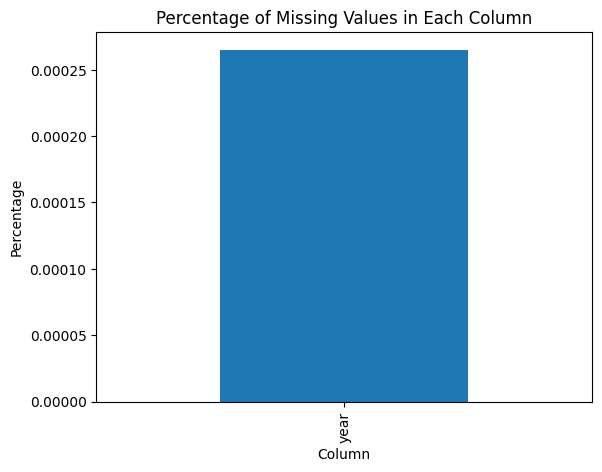

In [196]:
#check for any leftover missing values
missing = movie_ratings_train.isnull().sum()/len(movie_ratings_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title('Percentage of Missing Values in Each Column')
plt.ylabel('Percentage')
plt.xlabel('Column')
plt.show()


In [197]:
#drop year
movie_ratings_train = movie_ratings_train.drop(columns=['year'])

In [198]:
#change false into 0 and true into 1 for every column
for i in movie_ratings_train.columns:
    if movie_ratings_train[i].dtype == bool:
        movie_ratings_train[i] = movie_ratings_train[i].astype('int64')

Done with Pre-Processing!

## Modelling and Model Tuning

In [208]:
from sklearn.model_selection import train_test_split

#split train into train and validation 70/30

train, validation = train_test_split(movie_ratings_train, test_size=0.3, random_state=7)

#Split train into X_train and Y_train
X_train = train.drop(columns=['rating'])
Y_train = train['rating'].copy()

#Split validation into X_validation and Y_validation
X_validation = validation.drop(columns=['rating'])
Y_validation = validation['rating'].copy()

#Split whole dataset into X and Y
X = movie_ratings_train.drop(columns=['rating'])
Y = movie_ratings_train['rating'].copy()


In [209]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train.values.astype('float32'))

# Apply the scaler to the validation data
X_validation_scaled = scaler.transform(X_validation.values.astype('float32'))

In [210]:
X_validation.shape

(27157, 370)

In [211]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Train the model with early stopping
model.fit(X_train_scaled, Y_train.values.astype('float32'), epochs=50, callbacks=[early_stopping])

predictions = model.predict(X_validation_scaled)

Epoch 1/50
1981/1981 [==============================] - 5s 2ms/step - loss: 1.2220
Epoch 2/50
1981/1981 [==============================] - 2s 966us/step - loss: 0.9352
Epoch 3/50
1981/1981 [==============================] - 2s 961us/step - loss: 0.9055
Epoch 4/50
1981/1981 [==============================] - 2s 944us/step - loss: 0.8929
Epoch 5/50
1981/1981 [==============================] - 2s 964us/step - loss: 0.8819
Epoch 6/50
1981/1981 [==============================] - 2s 995us/step - loss: 0.8750
Epoch 7/50
1981/1981 [==============================] - 2s 967us/step - loss: 0.8673
Epoch 8/50
1981/1981 [==============================] - 2s 979us/step - loss: 0.8631
Epoch 9/50
1981/1981 [==============================] - 2s 979us/step - loss: 0.8554
Epoch 10/50
1981/1981 [==============================] - 2s 955us/step - loss: 0.8514
Epoch 11/50
1981/1981 [==============================] - 2s 970us/step - loss: 0.8445
Epoch 12/50
1981/1981 [==============================] - 2s 958us

In [213]:
predictions = model.predict(X_validation.values.astype('float32'))


849/849 [==============================] - 1s 875us/step


In [215]:
for p in predictions:
    #print p rounded to 2 decimal places
    print(f"{p[0]:.2f}")

316566976.00
374144992.00
400782912.00
361768512.00
225146864.00
295293088.00
229710240.00
263846752.00
320320000.00
413267168.00
419184960.00
289541440.00
352517920.00
393717280.00
374778176.00
326623040.00
395069984.00
393726592.00
249547648.00
378915520.00
392348608.00
422654656.00
388117632.00
262020400.00
263466896.00
391117216.00
305154272.00
338248160.00
388864768.00
309578944.00
299487360.00
228440992.00
261553728.00
374906976.00
305715712.00
342219648.00
328983520.00
379516800.00
293412064.00
301733152.00
325920256.00
366244512.00
390568256.00
424500288.00
273791808.00
340680672.00
291006208.00
310556512.00
344790240.00
378050496.00
369583456.00
377932992.00
379551168.00
292475488.00
318957312.00
232569632.00
264424736.00
230982976.00
272236032.00
234717856.00
390139936.00
425401152.00
421384992.00
325001728.00
343860448.00
363014400.00
423104992.00
290602048.00
330039776.00
291361792.00
396367584.00
225467632.00
364936384.00
375098784.00
268270592.00
265449408.00
397333856.00

Linear Regression

In [240]:
#split train into train and validation 70/30

train, validation = train_test_split(movie_ratings_train, test_size=0.3, random_state=7)

#Split train into X_train and Y_train
X_train = train.drop(columns=['rating'])
Y_train = train['rating'].copy()

#Split validation into X_validation and Y_validation
X_validation = validation.drop(columns=['rating'])
Y_validation = validation['rating'].copy()

#Split whole dataset into X and Y
X = movie_ratings_train.drop(columns=['rating'])
Y = movie_ratings_train['rating'].copy()

X_train = X_train.astype('float64')
Y_train = Y_train.astype('float64')

X_test = movie_ratings_test.astype('float64')

In [229]:
#backwards elimination
import statsmodels.api as sm

#find p-values
p_values = sm.OLS(Y_train, X_train).fit().pvalues

#find feature with largest p-value
max_p_value = p_values.max()
max_p_value_index = p_values.idxmax()
#iterate until max p-value is less than 0.05
while max_p_value > 0.05:
    #drop feature with largest p-value
    X_train = X_train.drop(columns=[max_p_value_index])
    X_validation = X_validation.drop(columns=[max_p_value_index])
    X = X.drop(columns=[max_p_value_index])
    #find p-values
    p_values = sm.OLS(Y_train, X_train).fit().pvalues
    #find feature with largest p-value
    max_p_value = p_values.max()
    max_p_value_index = p_values.idxmax()
    print(f"max p-value: {max_p_value}, max p-value index: {max_p_value_index}")



max p-value: 0.9963406001541684, max p-value index: release_year_1976
max p-value: 0.9955398089165575, max p-value index: original_language_de
max p-value: 0.9790408835498188, max p-value index: Belgium
max p-value: 0.9762627946552208, max p-value index: 20th Century Fox
max p-value: 0.9675311837994045, max p-value index: CNC
max p-value: 0.9671786809588745, max p-value index: Village Roadshow Pictures
max p-value: 0.9668308604980476, max p-value index: original_language_mk
max p-value: 0.9889934040830425, max p-value index: original_language_bg
max p-value: 0.9627211204843376, max p-value index: Working Title Films
max p-value: 0.9620409537098091, max p-value index: original_language_sh
max p-value: 0.9763131698285523, max p-value index: release_year_1908
max p-value: 0.9519971399153457, max p-value index: France 3 Cinéma
max p-value: 0.9473980455304414, max p-value index: release_year_1952
max p-value: 0.9399553942948953, max p-value index: release_year_1948
max p-value: 0.9374897697

NameError: name 'LinearRegression' is not defined

In [241]:
from sklearn.linear_model import LinearRegression

#print columns left
print(X_train.columns)
model_Columns = X_train.columns

#Now that we have columns we want, lets do linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

Index(['userId', 'movieId', 'timestamp', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Fantasy', 'Romance', 'Drama',
       ...
       'release_day_29', 'release_day_30', 'release_day_31',
       'release_day_of_week_0', 'release_day_of_week_1',
       'release_day_of_week_2', 'release_day_of_week_3',
       'release_day_of_week_4', 'release_day_of_week_5',
       'release_day_of_week_6'],
      dtype='object', length=370)


LinearRegression()

In [242]:
#predict on validation set

predictions = lin_reg.predict(X_validation)

#calculate rmse
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(Y_validation, predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE: {lin_rmse}")


RMSE: 0.9376468864270617


In [243]:
#Retrain with whole dataset
X = X[model_Columns]
X_test = X_test[model_Columns]
lin_reg.fit(X, Y)

#predict on test set
predictions = lin_reg.predict(X_test)

list_predictions = predictions.tolist()
print(list_predictions)

[3.2784539815070164, 3.297626268272601, 3.2167975168440903, 3.30852771255462, 3.301191765944678, 3.291417075977298, 3.218242650918587, 3.2872084152563983, 3.2805714430273665, 3.232116867330079, 3.1537311630516656, 3.2624207859675356, 3.2192839317859456, 3.2608986945626746, 3.2532556702442608, 3.1954006120459924, 3.2340360844170717, 3.2340054079094576, 3.2340670062884054, 3.5524258519952916, 3.4382002340791944, 3.549558592472514, 3.4001464922467894, 3.5903823877247194, 3.5361679048178156, 3.5826114023493862, 3.3863270913235635, 3.497069858576046, 3.574650939943276, 3.490769302277781, 3.56866617351998, 3.565388865680138, 3.4965056594865307, 3.516867805633412, 3.519811662630688, 3.5238551044991664, 3.443550828248387, 3.5588324997933802, 3.5555738047389935, 3.5137648657276217, 3.5200710501743946, 3.375596106195148, 3.349659986032826, 3.4853578407363903, 3.5447155891535673, 3.5369051728389667, 3.4733398429990894, 3.5320733777207254, 3.3849648034455573, 3.4708943370553627, 3.525742437022439,

## Final Model

RMSE (Hundreth of a Star): 105